## Image Recognition with CNNs in TensorFlow

This tutorial will guide you through implementing image recognition using Convolutional Neural Networks (CNNs) in TensorFlow

1. Understand CNNs and their components.

2. Implement a CNN using TensorFlow and Keras.

3. Train it on the CIFAR-10 dataset.

4. Evaluate and visualize predictions.


## Step 1: Understanding CNNs

## What is a CNN?

A Convolutional Neural Network (CNN) is a deep learning model used for image processing. CNNs extract spatial features from images and improve classification accuracy.

# Main Components of a CNN:

Convolutional Layers (Conv2D): Extract features from images using filters.

Activation Function (ReLU): Introduces non-linearity.

Pooling Layers (MaxPooling2D): Reduce dimensionality and preserve important features.

Flatten Layer: Converts the matrix into a 1D array.

Fully Connected (Dense) Layers: Classify the extracted features.


## Step 2: Install and Import Dependencies

In [1]:
import tensorflow as tf
from tensorflow.keras import Sequential
from tensorflow.keras.layers import Conv2D, MaxPooling2D, Flatten, Dense, Dropout
from tensorflow.keras.datasets import cifar10
import matplotlib.pyplot as plt
import numpy as np

## Step 3: Load and Explore the Dataset

We will use CIFAR-10, a dataset containing 60,000 images (32x32 pixels) in 10 categories, including airplanes, cars, birds, cats, and more.

Training data shape: (50000, 32, 32, 3), Labels shape: (50000, 1)
Test data shape: (10000, 32, 32, 3), Labels shape: (10000, 1)


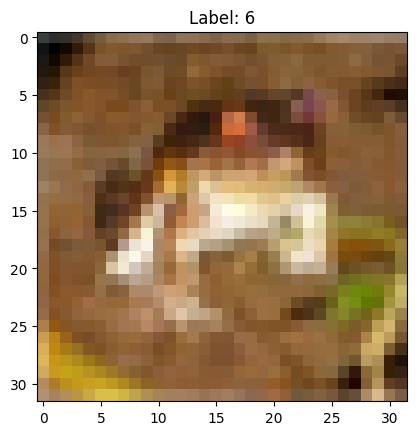

In [2]:
# Load CIFAR-10 dataset
(X_train, y_train), (X_test, y_test) = cifar10.load_data()

# Check dataset shapes
print(f"Training data shape: {X_train.shape}, Labels shape: {y_train.shape}")
print(f"Test data shape: {X_test.shape}, Labels shape: {y_test.shape}")

# Display a sample image
plt.imshow(X_train[0])
plt.title(f"Label: {y_train[0][0]}")
plt.show()


 ## Step 4: Data Preprocessing
 
Normalize pixel values (scale between 0 and 1).

Convert labels into one-hot encoding.

In [3]:
# Normalize pixel values
X_train = X_train / 255.0
X_test = X_test / 255.0

# Convert labels to one-hot encoding
y_train = tf.keras.utils.to_categorical(y_train, 10)
y_test = tf.keras.utils.to_categorical(y_test, 10)


## Step 5: Build the CNN Model

Our CNN consists of:

Three convolutional layers with 32, 64, and 128 filters.

Max pooling layers after each convolution.

Dropout layer to reduce overfitting.

Fully connected layers to classify images.

In [4]:
# Build CNN model
model = Sequential([
    Conv2D(32, (3, 3), activation='relu', input_shape=(32, 32, 3)),
    MaxPooling2D((2, 2)),
    
    Conv2D(64, (3, 3), activation='relu'),
    MaxPooling2D((2, 2)),
    
    Conv2D(128, (3, 3), activation='relu'),
    
    Flatten(),
    Dense(128, activation='relu'),
    Dropout(0.5),  # Prevent overfitting
    Dense(10, activation='softmax')  # Output layer for 10 classes
])

# Compile the model
model.compile(optimizer='adam',
              loss='categorical_crossentropy',
              metrics=['accuracy'])

# Display model summary
model.summary()


d:\TENSOR FLOW\Basics\venv\lib\site-packages\keras\src\layers\convolutional\base_conv.py:107: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


Model: "sequential"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ conv2d (Conv2D)                 │ (None, 30, 30, 32)     │           896 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d (MaxPooling2D)    │ (None, 15, 15, 32)     │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_1 (Conv2D)               │ (None, 13, 13, 64)     │        18,496 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_1 (MaxPooling2D)  │ (None, 6, 6, 64)       │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_2 (Conv2D)               │ (None, 4, 4, 128)      │        73,856 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ flatten (Flatten)               │ (None, 2048)           │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense (Dense)                   │ (None, 128)            │       262,272 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout (Dropout)               │ (None, 128)            │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_1 (Dense)                 │ (None, 10)             │         1,290 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 356,810 (1.36 MB)

 Trainable params: 356,810 (1.36 MB)

 Non-trainable params: 0 (0.00 B)

## Step 6: Train the Model

In [5]:
# Train the model
history = model.fit(X_train, y_train, epochs=10, batch_size=64, validation_split=0.2)


Epoch 1/10
625/625 ━━━━━━━━━━━━━━━━━━━━ 13s 19ms/step - accuracy: 0.2835 - loss: 1.9255 - val_accuracy: 0.5020 - val_loss: 1.4014
Epoch 2/10
625/625 ━━━━━━━━━━━━━━━━━━━━ 11s 18ms/step - accuracy: 0.4916 - loss: 1.4161 - val_accuracy: 0.5738 - val_loss: 1.2037
Epoch 3/10
625/625 ━━━━━━━━━━━━━━━━━━━━ 11s 17ms/step - accuracy: 0.5595 - loss: 1.2461 - val_accuracy: 0.6245 - val_loss: 1.0648
Epoch 4/10
625/625 ━━━━━━━━━━━━━━━━━━━━ 11s 18ms/step - accuracy: 0.6120 - loss: 1.1011 - val_accuracy: 0.6358 - val_loss: 1.0326
Epoch 5/10
625/625 ━━━━━━━━━━━━━━━━━━━━ 11s 17ms/step - accuracy: 0.6494 - loss: 1.0107 - val_accuracy: 0.6644 - val_loss: 0.9546
Epoch 6/10
625/625 ━━━━━━━━━━━━━━━━━━━━ 11s 17ms/step - accuracy: 0.6753 - loss: 0.9267 - val_accuracy: 0.7006 - val_loss: 0.8642
Epoch 7/10
625/625 ━━━━━━━━━━━━━━━━━━━━ 11s 17ms/step - accuracy: 0.7045 - loss: 0.8592 - val_accuracy: 0.6908 - val_loss: 0.8729
Epoch 8/10
625/625 ━━━━━━━━━━━━━━━━━━━━ 11s 17ms/step - accuracy: 0.7218 - loss: 0.7901 - 

 ## Step 7: Evaluate the Model
After training, we evaluate the model on the test dataset.




In [6]:
# Evaluate model
test_loss, test_accuracy = model.evaluate(X_test, y_test)
print(f"Test Accuracy: {test_accuracy:.2f}")


313/313 ━━━━━━━━━━━━━━━━━━━━ 1s 4ms/step - accuracy: 0.7220 - loss: 0.8281
Test Accuracy: 0.72


## Step 8: Visualize Training Performance

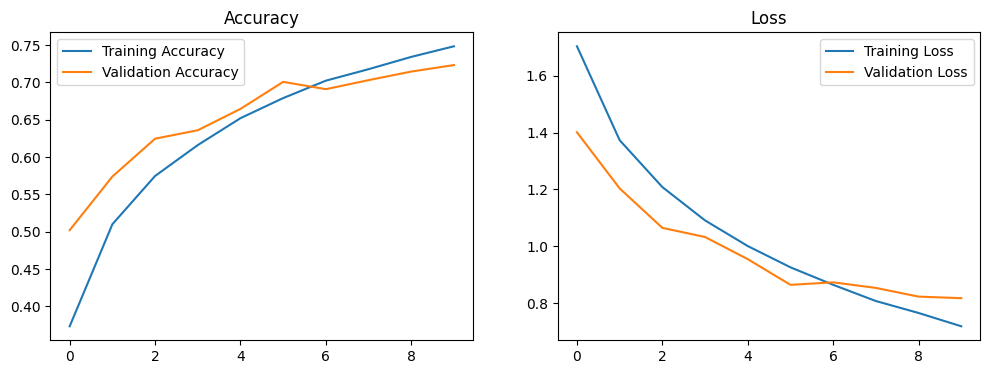

In [7]:
# Plot accuracy and loss
plt.figure(figsize=(12, 4))

# Accuracy
plt.subplot(1, 2, 1)
plt.plot(history.history['accuracy'], label='Training Accuracy')
plt.plot(history.history['val_accuracy'], label='Validation Accuracy')
plt.legend()
plt.title('Accuracy')

# Loss
plt.subplot(1, 2, 2)
plt.plot(history.history['loss'], label='Training Loss')
plt.plot(history.history['val_loss'], label='Validation Loss')
plt.legend()
plt.title('Loss')

plt.show()


## Step 9: Make Predictions

313/313 ━━━━━━━━━━━━━━━━━━━━ 1s 3ms/step


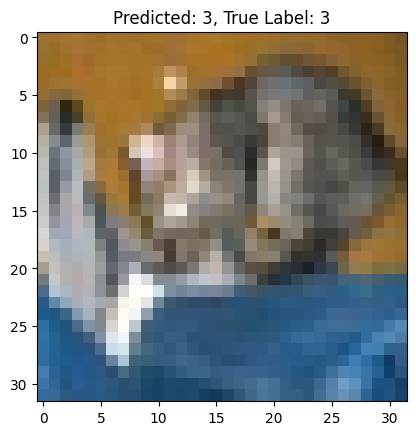

In [8]:
# Make predictions
predictions = model.predict(X_test)

# Show the first test image and predicted label
plt.imshow(X_test[0])
plt.title(f"Predicted: {np.argmax(predictions[0])}, True Label: {np.argmax(y_test[0])}")
plt.show()


 ## Step 10: Save and Load the Model

In [9]:
# Save the model
model.save('cnn_image_recognition.h5')

# Load the model (if needed)
# model = tf.keras.models.load_model('cnn_image_recognition.h5')
